# Download the dataset

In [1]:
!pip install kaggle

https://drive.google.com/file/d/12zu1MF8dScx0Y200dno6yGmY2Ql5s10-/view?usp=sharing

In [2]:
pip install -U gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [3]:
!gdown 12zu1MF8dScx0Y200dno6yGmY2Ql5s10-

Downloading...
From: https://drive.google.com/uc?id=12zu1MF8dScx0Y200dno6yGmY2Ql5s10-
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 381kB/s]


In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download Dataset
!kaggle datasets download -d vanviethieuanh/vietnam-weather-data

100% 1.88M/1.88M [00:01<00:00, 2.06MB/s]
100% 1.88M/1.88M [00:01<00:00, 1.81MB/s]


In [6]:
!unzip /content/vietnam-weather-data.zip

Archive:  /content/vietnam-weather-data.zip
  inflating: weather.csv             


# Imports

In [7]:
import csv
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from dataclasses import dataclass
from absl import logging
logging.set_verbosity(logging.ERROR)

In [10]:
import pandas as pd

# Utilities

In [42]:
def plot_series(time, series, format="-", start=0, end=None, ylabel = "Value"):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel(ylabel)
    plt.grid(True)

# Preview the Dataset

In [11]:
weather_df = pd.read_csv('/content/weather.csv')
weather_df

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01
...,...,...,...,...,...,...,...,...,...,...
181955,Soc Trang,28,23,8,SSW,0.0,75,50,1011,2016-12-28
181956,Soc Trang,30,24,21,ENE,7.2,81,50,1011,2017-12-28
181957,Soc Trang,26,24,9,ENE,1.3,91,75,1009,2018-12-28
181958,Soc Trang,30,23,11,E,0.0,74,6,1012,2019-12-28


**Filter to get only the city of Viet Tri**

In [12]:
weather_df = weather_df[weather_df['province'] == 'Viet Tri']
weather_df

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
104611,Viet Tri,18,12,6,NE,0.1,70,41,1025,2009-01-01
104612,Viet Tri,15,11,5,ESE,0.2,69,32,1025,2009-01-02
104617,Viet Tri,17,16,5,NE,6.2,92,100,1015,2010-01-01
104618,Viet Tri,18,15,4,E,1.1,87,82,1015,2011-01-01
104619,Viet Tri,19,14,4,ENE,0.3,70,71,1021,2012-01-01
...,...,...,...,...,...,...,...,...,...,...
109340,Viet Tri,20,11,4,ESE,0.0,60,8,1025,2016-12-29
109341,Viet Tri,20,14,4,SE,0.2,81,86,1020,2017-12-29
109342,Viet Tri,14,11,7,NE,10.0,85,100,1025,2018-12-29
109343,Viet Tri,22,14,5,NW,0.2,68,48,1018,2019-12-29


In [13]:
weather_df.to_csv('viet_tri.csv', index = False)

In [14]:
TEMPERATURES_CSV = '/content/viet_tri.csv'

with open(TEMPERATURES_CSV, 'r') as csvfile:
    print(f"Header looks like this:\n\n{csvfile.readline()}")
    print(f"First data point looks like this:\n\n{csvfile.readline()}")
    print(f"Second data point looks like this:\n\n{csvfile.readline()}")

Header looks like this:

province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date

First data point looks like this:

Viet Tri,18,12,6,NE,0.1,70,41,1025,2009-01-01

Second data point looks like this:

Viet Tri,15,11,5,ESE,0.2,69,32,1025,2009-01-02



# Parsing the raw data

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
values = weather_df.values

In [18]:
values[:,4] = encoder.fit_transform(values[:,4])

In [19]:
values

array([['Viet Tri', 18, 12, ..., 41, 1025, '2009-01-01'],
       ['Viet Tri', 15, 11, ..., 32, 1025, '2009-01-02'],
       ['Viet Tri', 17, 16, ..., 100, 1015, '2010-01-01'],
       ...,
       ['Viet Tri', 14, 11, ..., 100, 1025, '2018-12-29'],
       ['Viet Tri', 22, 14, ..., 48, 1018, '2019-12-29'],
       ['Viet Tri', 24, 21, ..., 74, 1013, '2020-12-29']], dtype=object)

In [20]:
values = values[:, 1:-1]

In [21]:
values

array([[18, 12, 6, ..., 70, 41, 1025],
       [15, 11, 5, ..., 69, 32, 1025],
       [17, 16, 5, ..., 92, 100, 1015],
       ...,
       [14, 11, 7, ..., 85, 100, 1025],
       [22, 14, 5, ..., 68, 48, 1018],
       [24, 21, 12, ..., 81, 74, 1013]], dtype=object)

In [24]:
encoder.inverse_transform([5])

array(['NNW'], dtype=object)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [28]:
scaled = scaler.fit_transform(values)

In [29]:
scaled

array([[0.32432432, 0.34482759, 0.23529412, ..., 0.6       , 0.41      ,
        0.72093023],
       [0.24324324, 0.31034483, 0.17647059, ..., 0.58571429, 0.32      ,
        0.72093023],
       [0.2972973 , 0.48275862, 0.17647059, ..., 0.91428571, 1.        ,
        0.48837209],
       ...,
       [0.21621622, 0.31034483, 0.29411765, ..., 0.81428571, 1.        ,
        0.72093023],
       [0.43243243, 0.4137931 , 0.17647059, ..., 0.57142857, 0.48      ,
        0.55813953],
       [0.48648649, 0.65517241, 0.58823529, ..., 0.75714286, 0.74      ,
        0.44186047]])

In [30]:
scaled.shape

(4549, 8)

In [32]:
times = list(range(scaled.shape[0]))

In [35]:
weathers = scaled.astype('float32')

In [36]:
weathers

array([[0.3243243 , 0.3448276 , 0.23529412, ..., 0.6       , 0.41      ,
        0.7209302 ],
       [0.24324325, 0.31034482, 0.1764706 , ..., 0.5857143 , 0.32      ,
        0.7209302 ],
       [0.2972973 , 0.4827586 , 0.1764706 , ..., 0.9142857 , 1.        ,
        0.4883721 ],
       ...,
       [0.21621622, 0.31034482, 0.29411766, ..., 0.8142857 , 1.        ,
        0.7209302 ],
       [0.43243244, 0.41379312, 0.1764706 , ..., 0.5714286 , 0.48      ,
        0.55813956],
       [0.4864865 , 0.6551724 , 0.5882353 , ..., 0.75714284, 0.74      ,
        0.44186047]], dtype=float32)

In [ ]:
def parse_data_from_file(filename):

    times = []
    weathers = []

    with open(filename) as csvfile:

        ### START CODE HERE

        reader = csv.reader(csvfile, delimiter=',')

        next(reader)

        # Initialize a counter for timestamps
        timestamp = 0

        for row in reader:
            times.append(timestamp)
            max_temperatures.append(float(row[1]))
            min_temperatures.append(float(row[2]))
            timestamp += 1

        ### END CODE HERE

    return times, min_temperatures, max_temperatures

# With series of max_temperatures:

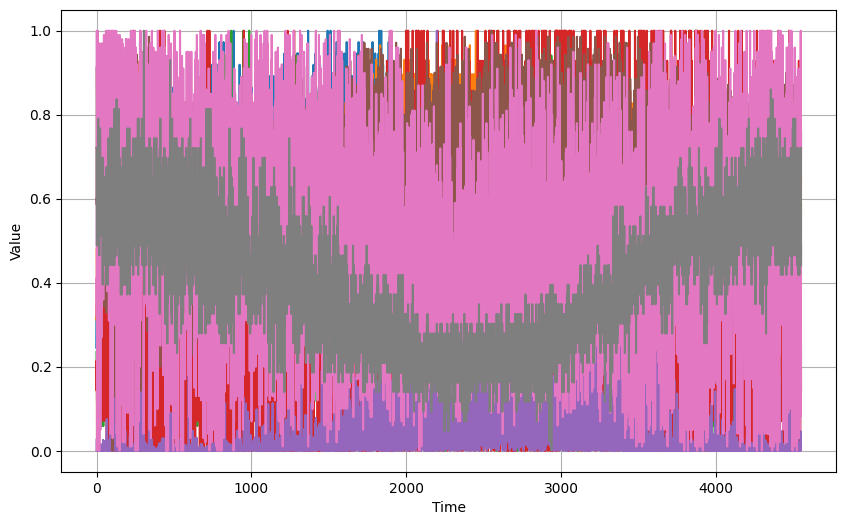

In [43]:
# Test your function and save all "global" variables within the G class (G stands for global)
@dataclass
class G:
    TEMPERATURES_CSV = '/content/viet_tri.csv'
    # times, weathers = parse_data_from_file(TEMPERATURES_CSV)
    TIME = np.array(times)
    SERIES = np.array(weathers)
    SPLIT_TIME = 3500
    WINDOW_SIZE = 30
    BATCH_SIZE = 32
    SHUFFLE_BUFFER_SIZE = 500


plt.figure(figsize=(10, 6))
plot_series(G.TIME, G.SERIES)
plt.show()

In [40]:
len(['max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud', 'pressure'])

8

In [41]:
G.SERIES.shape

(4549, 8)

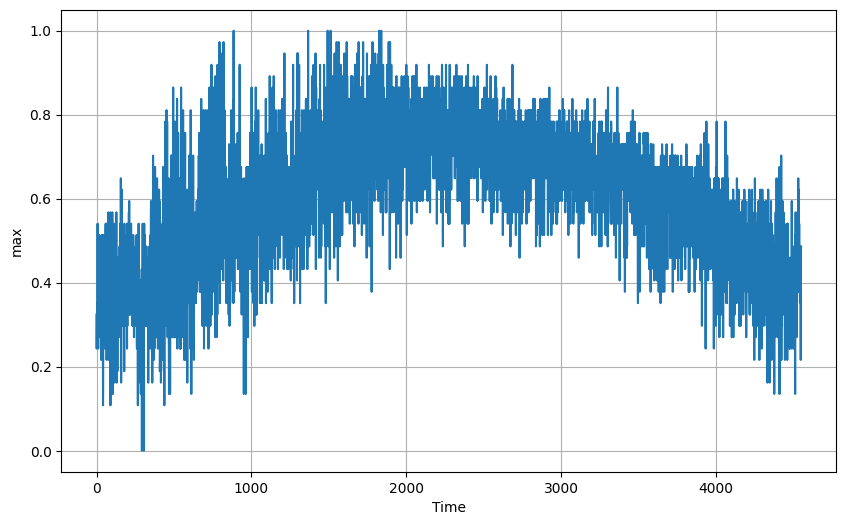

In [44]:
features = ['max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud', 'pressure']

ftr = 0
plt.figure(figsize=(10, 6))
plot_series(G.TIME, G.SERIES[:, ftr], ylabel = features[ftr])
plt.show()

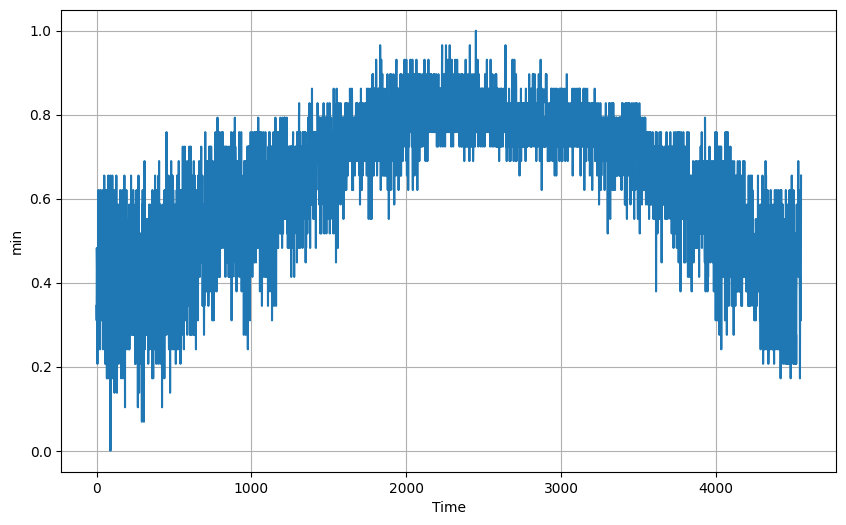

In [45]:
features = ['max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud', 'pressure']

ftr = 1
plt.figure(figsize=(10, 6))
plot_series(G.TIME, G.SERIES[:, ftr], ylabel = features[ftr])
plt.show()

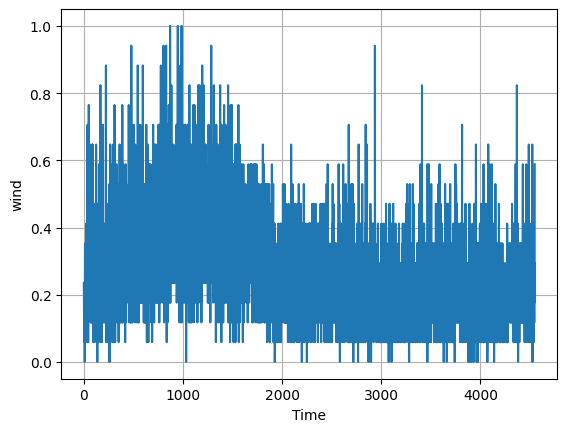

In [48]:
ftr = 2
plot_series(G.TIME, G.SERIES[:, ftr], ylabel = features[ftr])

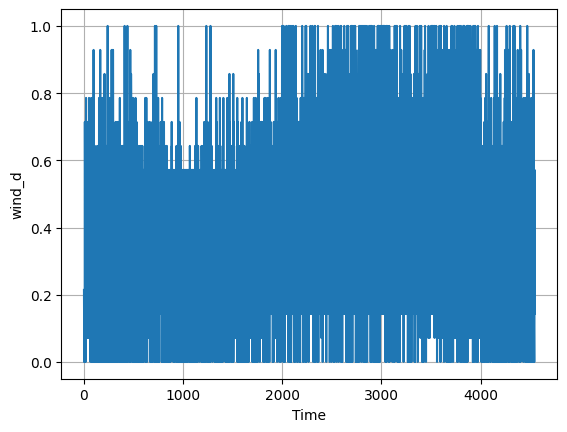

In [49]:
ftr = 3
plot_series(G.TIME, G.SERIES[:, ftr], ylabel = features[ftr])

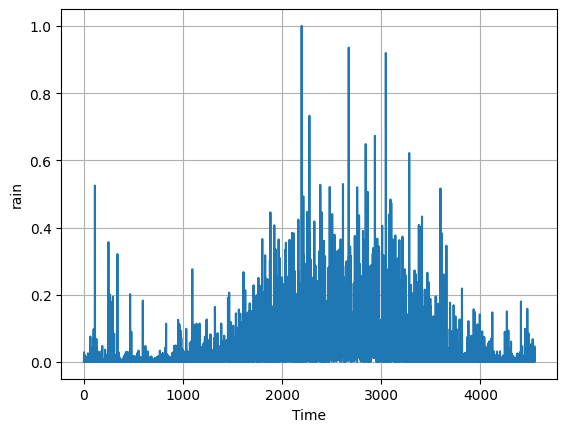

In [50]:
ftr = 4
plot_series(G.TIME, G.SERIES[:, ftr], ylabel = features[ftr])

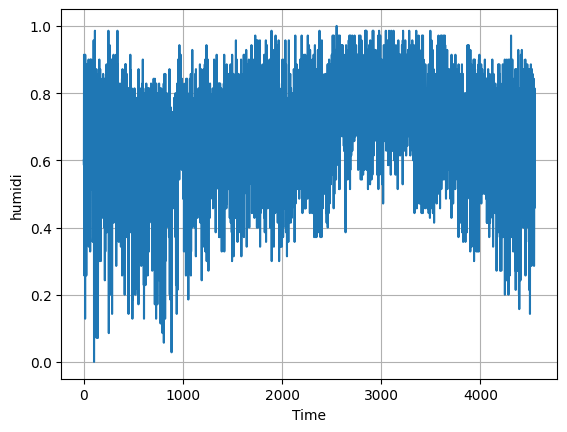

In [51]:
ftr = 5
plot_series(G.TIME, G.SERIES[:, ftr], ylabel = features[ftr])

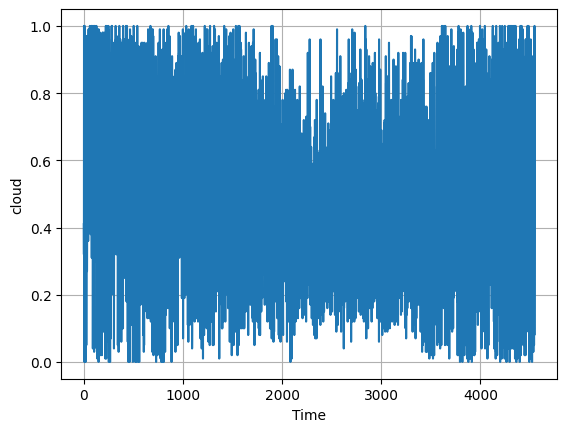

In [52]:
ftr = 6
plot_series(G.TIME, G.SERIES[:, ftr], ylabel = features[ftr])

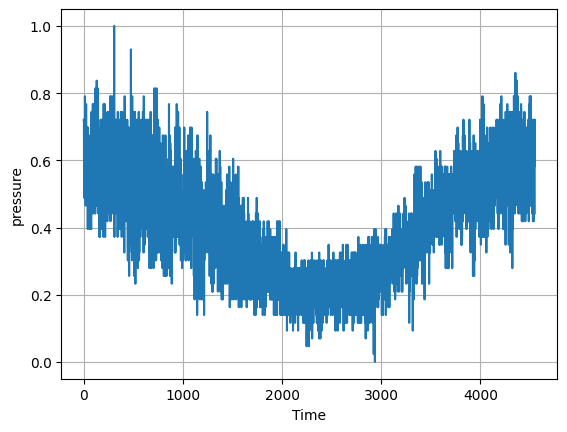

In [53]:
ftr = 7
plot_series(G.TIME, G.SERIES[:, ftr], ylabel = features[ftr])

# Processing the data

In [ ]:
def train_val_split(time, series, time_step=G.SPLIT_TIME):

    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid


# Split the dataset
time_train, series_train, time_valid, series_valid = train_val_split(G.TIME, G.SERIES)

In [ ]:
def windowed_dataset(series, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds


# Apply the transformation to the training set
train_set = windowed_dataset(series_train, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

# Defining the model architecture

In [ ]:
def create_uncompiled_model():

    ### START CODE HERE

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[G.WINDOW_SIZE, 1]),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1)
    ])

    ### END CODE HERE

    return model

In [ ]:
# Test your uncompiled model

# Create an instance of the model
uncompiled_model = create_uncompiled_model()

# Get one batch of the training set(X = input, y = label)
for X, y in train_set.take(1):

    # Generate a prediction
    print(f'Testing model prediction with input of shape {X.shape}...')
    y_pred = uncompiled_model.predict(X)

# Compare the shape of the prediction and the label y (remove dimensions of size 1)
y_pred_shape = y_pred.squeeze().shape

assert y_pred_shape == y.shape, (f'Squeezed predicted y shape = {y_pred_shape} '
                                           f'whereas actual y shape = {y.shape}.')

print("Your current architecture is compatible with the windowed dataset! :)")

Testing model prediction with input of shape (32, 64)...
1/1 [==============================] - 2s 2s/step
Your current architecture is compatible with the windowed dataset! :)


# Adjusting the learning rate

In [ ]:
def adjust_learning_rate(dataset):

    model = create_uncompiled_model()

    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

    ### START CODE HERE

    # Select your optimizer
    optimizer = tf.keras.optimizers.SGD(momentum=0.9)

    # Compile the model passing in the appropriate loss
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])

    ### END CODE HERE

    history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

    return history

In [ ]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(train_set)

Epoch 1/100
77/77 [==============================] - 7s 14ms/step - loss: 26.9877 - mae: 27.4877 - lr: 1.0000e-04
Epoch 2/100
77/77 [==============================] - 1s 11ms/step - loss: 22.7280 - mae: 23.2280 - lr: 1.1220e-04
Epoch 3/100
77/77 [==============================] - 1s 12ms/step - loss: 7.6579 - mae: 8.1458 - lr: 1.2589e-04
Epoch 4/100
77/77 [==============================] - 1s 11ms/step - loss: 4.8012 - mae: 5.2797 - lr: 1.4125e-04
Epoch 5/100
77/77 [==============================] - 1s 11ms/step - loss: 4.5638 - mae: 5.0380 - lr: 1.5849e-04
Epoch 6/100
77/77 [==============================] - 2s 18ms/step - loss: 4.0557 - mae: 4.5316 - lr: 1.7783e-04
Epoch 7/100
77/77 [==============================] - 2s 20ms/step - loss: 3.6339 - mae: 4.1047 - lr: 1.9953e-04
Epoch 8/100
77/77 [==============================] - 1s 12ms/step - loss: 3.0066 - mae: 3.4708 - lr: 2.2387e-04
Epoch 9/100
77/77 [==============================] - 1s 11ms/step - loss: 2.9372 - mae: 3.4032 - lr:

(0.0001, 10.0, 0.0, 10.0)

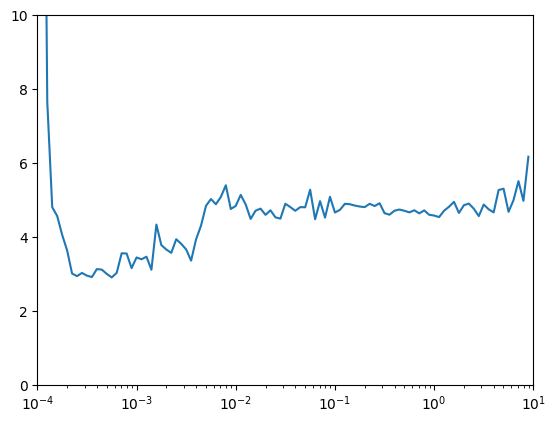

In [ ]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 10, 0, 10])

# Compiling the model

In [ ]:
def create_model():


    model = create_uncompiled_model()

    ### START CODE HERE

    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),
                  metrics=["mae"])


    ### END CODE HERE

    return model

In [ ]:
# Save an instance of the model
model = create_model()

# Train it
history = model.fit(train_set, epochs=50)

Epoch 1/50
77/77 [==============================] - 4s 12ms/step - loss: 22.7087 - mae: 23.2065
Epoch 2/50
77/77 [==============================] - 2s 19ms/step - loss: 5.2059 - mae: 5.6848
Epoch 3/50
77/77 [==============================] - 1s 13ms/step - loss: 4.5418 - mae: 5.0208
Epoch 4/50
77/77 [==============================] - 2s 20ms/step - loss: 4.3101 - mae: 4.7816
Epoch 5/50
77/77 [==============================] - 1s 11ms/step - loss: 4.4915 - mae: 4.9669
Epoch 6/50
77/77 [==============================] - 1s 11ms/step - loss: 4.5216 - mae: 4.9971
Epoch 7/50
77/77 [==============================] - 1s 12ms/step - loss: 4.6432 - mae: 5.1225
Epoch 8/50
77/77 [==============================] - 1s 12ms/step - loss: 4.7131 - mae: 5.1906
Epoch 9/50
77/77 [==============================] - 1s 14ms/step - loss: 4.6379 - mae: 5.1155
Epoch 10/50
77/77 [==============================] - 2s 20ms/step - loss: 4.7125 - mae: 5.1907
Epoch 11/50
77/77 [==============================] - 1s 1

# Evaluating the forecast

In [ ]:
def compute_metrics(true_series, forecast):

    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()

    return mse, mae

# Faster model forecasts

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

141/141 [==============================] - 1s 7ms/step


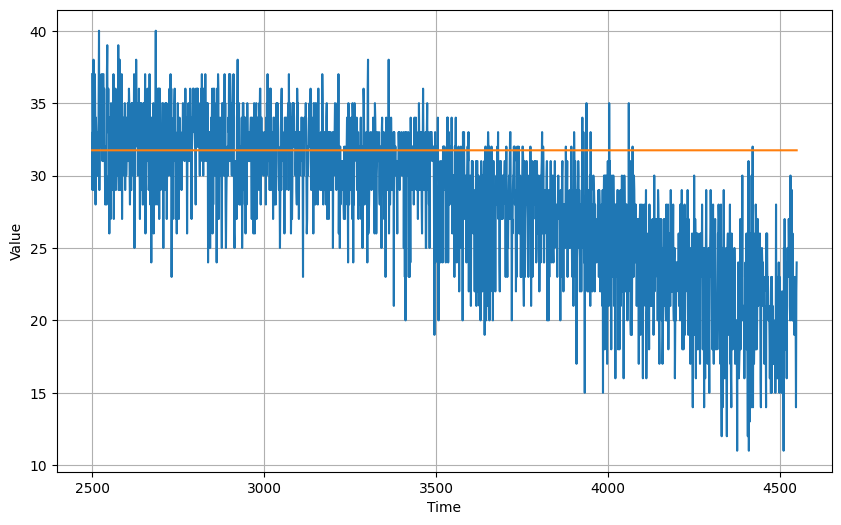

In [ ]:
# Compute the forecast for all the series
rnn_forecast = model_forecast(model, G.SERIES, G.WINDOW_SIZE).squeeze()

# Slice the forecast to get only the predictions for the validation set
rnn_forecast = rnn_forecast[G.SPLIT_TIME - G.WINDOW_SIZE:-1]

# Plot the forecast
plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid)
plot_series(time_valid, rnn_forecast)

In [ ]:
mse, mae = compute_metrics(series_valid, rnn_forecast)

print(f"mse: {mse:.2f}, mae: {mae:.2f} for forecast")

mse: 38.46, mae: 4.63 for forecast


# Save the model

In [ ]:
# Save your model in the SavedModel format
model.save('saved_model/max_temperatures')

# Compress the directory using tar
! tar -czvf saved_model.tar.gz saved_model/

saved_model/
saved_model/max_temperatures/
saved_model/max_temperatures/assets/
saved_model/max_temperatures/variables/
saved_model/max_temperatures/variables/variables.data-00000-of-00001
saved_model/max_temperatures/variables/variables.index
saved_model/max_temperatures/saved_model.pb
saved_model/max_temperatures/fingerprint.pb
saved_model/max_temperatures/keras_metadata.pb


# Download model saved

In [ ]:
!zip -r max_temperatures.zip /content/saved_model/max_temperatures


  adding: content/saved_model/max_temperatures/ (stored 0%)
  adding: content/saved_model/max_temperatures/assets/ (stored 0%)
  adding: content/saved_model/max_temperatures/variables/ (stored 0%)
  adding: content/saved_model/max_temperatures/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: content/saved_model/max_temperatures/variables/variables.index (deflated 62%)
  adding: content/saved_model/max_temperatures/saved_model.pb (deflated 90%)
  adding: content/saved_model/max_temperatures/fingerprint.pb (stored 0%)
  adding: content/saved_model/max_temperatures/keras_metadata.pb (deflated 91%)


# Try different hyperparameters

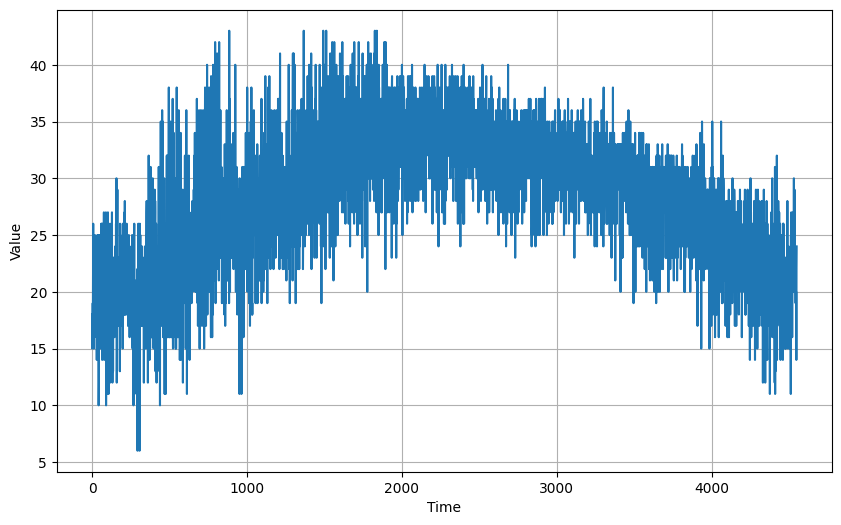

In [ ]:
# Test your function and save all "global" variables within the G class (G stands for global)
@dataclass
class G:
    TEMPERATURES_CSV = '/content/viet_tri.csv'
    times, min_temperatures, max_temperatures = parse_data_from_file(TEMPERATURES_CSV)
    TIME = np.array(times)
    SERIES = np.array(max_temperatures)
    SPLIT_TIME = 4000
    WINDOW_SIZE = 30
    BATCH_SIZE = 32
    SHUFFLE_BUFFER_SIZE = 500


plt.figure(figsize=(10, 6))
plot_series(G.TIME, G.SERIES)
plt.show()

In [ ]:
def train_val_split(time, series, time_step=G.SPLIT_TIME):

    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid


# Split the dataset
time_train, series_train, time_valid, series_valid = train_val_split(G.TIME, G.SERIES)

In [ ]:
def windowed_dataset(series, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds


# Apply the transformation to the training set
train_set = windowed_dataset(series_train, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

In [ ]:
def create_uncompiled_model():

    ### START CODE HERE

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[G.WINDOW_SIZE, 1]),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1)
    ])

    ### END CODE HERE

    return model

In [ ]:
# Test your uncompiled model

# Create an instance of the model
uncompiled_model = create_uncompiled_model()

# Get one batch of the training set(X = input, y = label)
for X, y in train_set.take(1):

    # Generate a prediction
    print(f'Testing model prediction with input of shape {X.shape}...')
    y_pred = uncompiled_model.predict(X)

# Compare the shape of the prediction and the label y (remove dimensions of size 1)
y_pred_shape = y_pred.squeeze().shape

assert y_pred_shape == y.shape, (f'Squeezed predicted y shape = {y_pred_shape} '
                                           f'whereas actual y shape = {y.shape}.')

print("Your current architecture is compatible with the windowed dataset! :)")

Testing model prediction with input of shape (32, 30)...
1/1 [==============================] - 1s 790ms/step
Your current architecture is compatible with the windowed dataset! :)


In [ ]:
def create_model():


    model = create_uncompiled_model()

    ### START CODE HERE

    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),
                  metrics=["mae"])


    ### END CODE HERE

    return model

In [ ]:
# Save an instance of the model
model = create_model()

# Train it
history = model.fit(train_set, epochs=50)

Epoch 1/50
125/125 [==============================] - 5s 11ms/step - loss: 13.3091 - mae: 13.7947
Epoch 2/50
125/125 [==============================] - 1s 10ms/step - loss: 3.1900 - mae: 3.6564
Epoch 3/50
125/125 [==============================] - 1s 11ms/step - loss: 3.2299 - mae: 3.6969
Epoch 4/50
125/125 [==============================] - 3s 25ms/step - loss: 3.1191 - mae: 3.5849
Epoch 5/50
125/125 [==============================] - 2s 15ms/step - loss: 3.2528 - mae: 3.7237
Epoch 6/50
125/125 [==============================] - 1s 11ms/step - loss: 3.1781 - mae: 3.6447
Epoch 7/50
125/125 [==============================] - 2s 14ms/step - loss: 3.0945 - mae: 3.5607
Epoch 8/50
125/125 [==============================] - 2s 15ms/step - loss: 3.0791 - mae: 3.5448
Epoch 9/50
125/125 [==============================] - 3s 21ms/step - loss: 3.1422 - mae: 3.6087
Epoch 10/50
125/125 [==============================] - 2s 18ms/step - loss: 3.0435 - mae: 3.5101
Epoch 11/50
125/125 [================

In [ ]:
def compute_metrics(true_series, forecast):

    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()

    return mse, mae

142/142 [==============================] - 2s 6ms/step


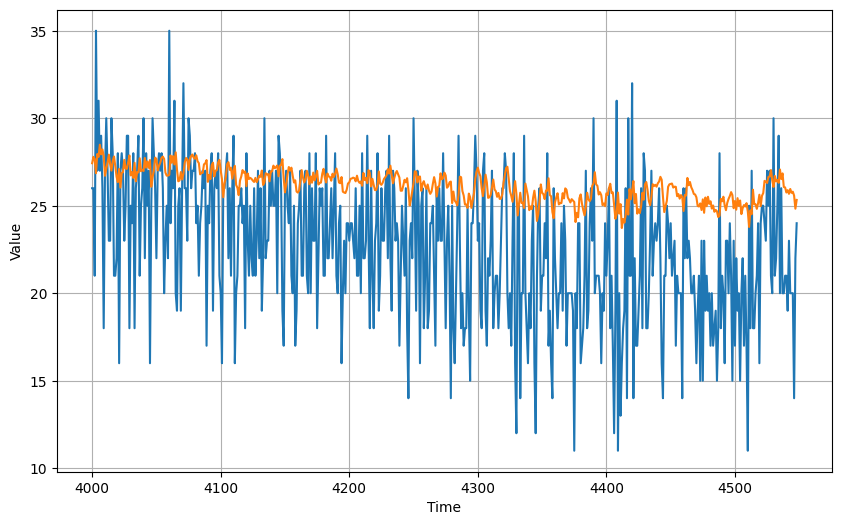

In [ ]:
# Compute the forecast for all the series
rnn_forecast = model_forecast(model, G.SERIES, G.WINDOW_SIZE).squeeze()

# Slice the forecast to get only the predictions for the validation set
rnn_forecast = rnn_forecast[G.SPLIT_TIME - G.WINDOW_SIZE:-1]

# Plot the forecast
plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid)
plot_series(time_valid, rnn_forecast)

# With the series of min_temperatures:

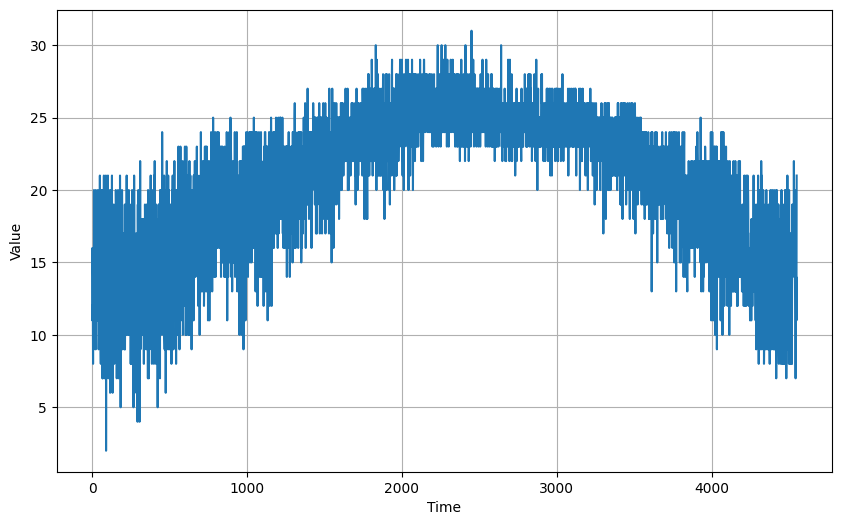

In [ ]:
# Test your function and save all "global" variables within the G class (G stands for global)
@dataclass
class G:
    TEMPERATURES_CSV = '/content/viet_tri.csv'
    times, min_temperatures, max_temperatures = parse_data_from_file(TEMPERATURES_CSV)
    TIME = np.array(times)
    SERIES = np.array(min_temperatures)
    SPLIT_TIME = 3500
    WINDOW_SIZE = 30
    BATCH_SIZE = 32
    SHUFFLE_BUFFER_SIZE = 500


plt.figure(figsize=(10, 6))
plot_series(G.TIME, G.SERIES)
plt.show()

In [ ]:
def train_val_split(time, series, time_step=G.SPLIT_TIME):

    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid


# Split the dataset
time_train, series_train, time_valid, series_valid = train_val_split(G.TIME, G.SERIES)

In [ ]:
def windowed_dataset(series, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds


# Apply the transformation to the training set
train_set = windowed_dataset(series_train, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

In [ ]:
def create_uncompiled_model():

    ### START CODE HERE

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[G.WINDOW_SIZE, 1]),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1)
    ])

    ### END CODE HERE

    return model

In [ ]:
# Test your uncompiled model

# Create an instance of the model
uncompiled_model = create_uncompiled_model()

# Get one batch of the training set(X = input, y = label)
for X, y in train_set.take(1):

    # Generate a prediction
    print(f'Testing model prediction with input of shape {X.shape}...')
    y_pred = uncompiled_model.predict(X)

# Compare the shape of the prediction and the label y (remove dimensions of size 1)
y_pred_shape = y_pred.squeeze().shape

assert y_pred_shape == y.shape, (f'Squeezed predicted y shape = {y_pred_shape} '
                                           f'whereas actual y shape = {y.shape}.')

print("Your current architecture is compatible with the windowed dataset! :)")

Testing model prediction with input of shape (32, 30)...
1/1 [==============================] - 1s 704ms/step
Your current architecture is compatible with the windowed dataset! :)


In [ ]:
def create_model():


    model = create_uncompiled_model()

    ### START CODE HERE

    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),
                  metrics=["mae"])


    ### END CODE HERE

    return model

In [ ]:
# Save an instance of the model
model = create_model()

# Train it
history = model.fit(train_set, epochs=50)

Epoch 1/50
109/109 [==============================] - 5s 14ms/step - loss: 7.9956 - mae: 8.4683
Epoch 2/50
109/109 [==============================] - 1s 12ms/step - loss: 2.2911 - mae: 2.7376
Epoch 3/50
109/109 [==============================] - 1s 10ms/step - loss: 2.2217 - mae: 2.6652
Epoch 4/50
109/109 [==============================] - 1s 10ms/step - loss: 2.1418 - mae: 2.5846
Epoch 5/50
109/109 [==============================] - 1s 10ms/step - loss: 2.2268 - mae: 2.6716
Epoch 6/50
109/109 [==============================] - 1s 10ms/step - loss: 2.1875 - mae: 2.6348
Epoch 7/50
109/109 [==============================] - 1s 10ms/step - loss: 2.3035 - mae: 2.7524
Epoch 8/50
109/109 [==============================] - 1s 12ms/step - loss: 2.2317 - mae: 2.6761
Epoch 9/50
109/109 [==============================] - 2s 16ms/step - loss: 2.1869 - mae: 2.6333
Epoch 10/50
109/109 [==============================] - 1s 10ms/step - loss: 2.1632 - mae: 2.6084
Epoch 11/50
109/109 [==================

In [ ]:
def compute_metrics(true_series, forecast):

    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()

    return mse, mae

142/142 [==============================] - 1s 6ms/step


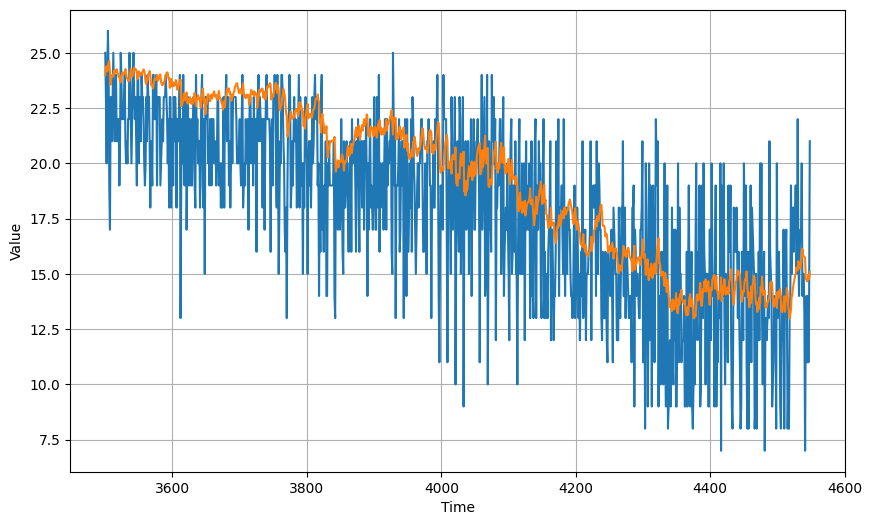

In [ ]:
# Compute the forecast for all the series
rnn_forecast = model_forecast(model, G.SERIES, G.WINDOW_SIZE).squeeze()

# Slice the forecast to get only the predictions for the validation set
rnn_forecast = rnn_forecast[G.SPLIT_TIME - G.WINDOW_SIZE:-1]

# Plot the forecast
plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid)
plot_series(time_valid, rnn_forecast)

In [ ]:
mse, mae = compute_metrics(series_valid, rnn_forecast)

print(f"mse: {mse:.2f}, mae: {mae:.2f} for forecast")

mse: 10.81, mae: 2.57 for forecast


In [ ]:
# Save your model in the SavedModel format
model.save('saved_model/min_temperatures')

In [ ]:
!zip -r min_temperatures.zip /content/saved_model/min_temperatures


  adding: content/saved_model/min_temperatures/ (stored 0%)
  adding: content/saved_model/min_temperatures/assets/ (stored 0%)
  adding: content/saved_model/min_temperatures/variables/ (stored 0%)
  adding: content/saved_model/min_temperatures/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: content/saved_model/min_temperatures/variables/variables.index (deflated 62%)
  adding: content/saved_model/min_temperatures/saved_model.pb (deflated 90%)
  adding: content/saved_model/min_temperatures/fingerprint.pb (stored 0%)
  adding: content/saved_model/min_temperatures/keras_metadata.pb (deflated 91%)
